<a href="https://colab.research.google.com/github/cedricbansah/new-york-housing-eda/blob/master/ny_housing_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#reading the dataset

data = pd.read_csv('AB_NYC_2019.csv')
data.shape

(48895, 16)

In [3]:
data.info()   #get summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [150]:
#  select the necessary features for model

df = data[['neighbourhood_group', 'neighbourhood', 'room_type', 'price']]
df.head()

,neighbourhood_group,neighbourhood,room_type,price
0,Brooklyn,Kensington,Private room,149
1,Manhattan,Midtown,Entire home/apt,225
2,Manhattan,Harlem,Private room,150
3,Brooklyn,Clinton Hill,Entire home/apt,89
4,Manhattan,East Harlem,Entire home/apt,80


In [8]:
# get summary of central measures of dispersion

df.describe() 

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


Cleaning the data

-----------------
A boxplot will be plotted to help check and free the dataset from outliers.

In [126]:
# extract the price column as a Series

price = pd.Series(df['price'])
price.tail(10)

48885     75
48886    200
48887    170
48888    125
48889     65
48890     70
48891     40
48892    115
48893     55
48894     90
Name: price, dtype: int64

{'boxes': [<matplotlib.lines.Line2D at 0x7f4c0c50aba8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f4c0c499630>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f4c0c4a10f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f4c0c499d30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f4c0c50aef0>,
  <matplotlib.lines.Line2D at 0x7f4c0c4992b0>]}

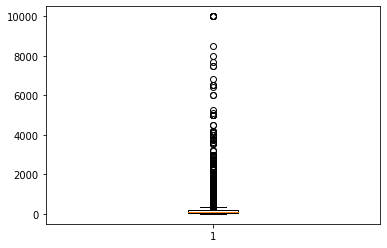

In [128]:
# plot the boxplot 

plt.boxplot(price)

It is evident from the boxplot that there are several outliers above the upper limit. The Interquartile range shall be used to get rid of them.

In [137]:
q1 = price.quantile(0.25)  # get first quartile  
q3 = price.quantile(0.75)  # get third quartile
iqr = q3 - q1   # get interquartile range

print(q1, q3)
print('IQR: ', iqr)

69.0 175.0
IQR:  106.0


In [139]:
upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
print('Outlier Upper Limit: ', upper_limit)
print('Outlier Lower Limit: ', lower_limit)

Outlier Upper Limit:  334.0
Outlier Lower Limit:  -90.0


In [140]:
lower_outliers = price[price < lower_limit].count()
upper_outliers = price[price < upper_limit].count()

print("Lower Outliers: ", lower_outliers)
print("Upper Outliers: ", upper_outliers)

Lower Outliers:  0
Upper Outliers:  45918


In [170]:
newdf = df.loc[df['price'] < upper_limit]
newdf.describe()

,price
count,45918.000000
mean,119.947014
std,68.117249
min,0.000000
25%,65.000000
50%,100.000000
75%,159.000000
max,333.000000


In [172]:
(newdf.shape[0]/df.shape[0])*100 

93.91144288782084

After cleaning, the final dataset will have 94% of the initial entries 

In [173]:
newdf['neighbourhood_group'].value_counts()

Manhattan        19501
Brooklyn         19415
Queens            5567
Bronx             1070
Staten Island      365
Name: neighbourhood_group, dtype: int64

In [158]:
manhattan_df = newdf[newdf['neighbourhood_group'] == 'Manhattan']
brooklyn_df = newdf[newdf['neighbourhood_group'] == 'Brooklyn']
bronx_df = newdf[newdf['neighbourhood_group'] == 'Bronx']
queens_df = newdf[newdf['neighbourhood_group'] == 'Queens']
staten_df = newdf[newdf['neighbourhood_group'] == 'Staten Island']  

In [180]:
def count_values(data, column):
  vc = data[column].value_counts()
  count_plot = sns.countplot(data[column])
  return vc 
  return count_plot

Entire home/apt    11289
Private room        7747
Shared room          465
Name: room_type, dtype: int64

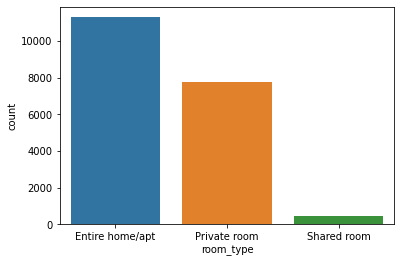

In [181]:
count_values(data=manhattan_df, column='room_type')

Private room       10062
Entire home/apt     8942
Shared room          411
Name: room_type, dtype: int64

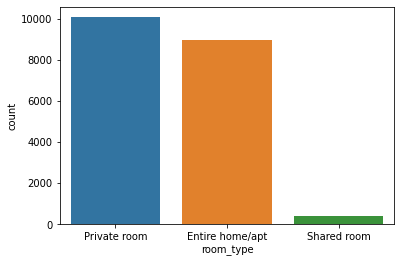

In [166]:
count_values(data=brooklyn_df, column='room_type')

Private room       3351
Entire home/apt    2022
Shared room         194
Name: room_type, dtype: int64

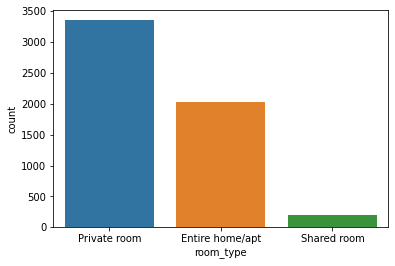

In [167]:
count_values(data=queens_df, column='room_type')

Private room       648
Entire home/apt    363
Shared room         59
Name: room_type, dtype: int64

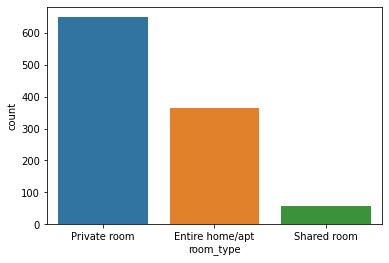

In [168]:
count_values(data=bronx_df, column='room_type')

Private room       188
Entire home/apt    168
Shared room          9
Name: room_type, dtype: int64

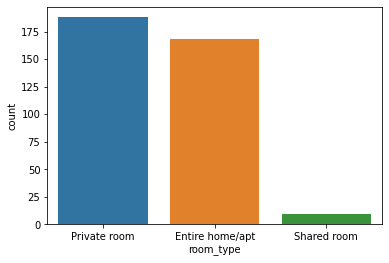

In [169]:
count_values(data=staten_df, column='room_type')